In [9]:
#importing the libraries
import pandas as pd
import numpy as np

In [10]:
#loading the data
df_train=pd.read_csv("/content/train.csv")

In [11]:

df_test=pd.read_excel("/content/test.xlsx")

In [6]:
df_test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,
0,5979389,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,strict,True,NYC,2 bedroom apartment 3 blocks away from the Dek...,NaT,t,t,1.0,2015-05-29,f,NaT,40.705948,-73.915318,Bedroom in Renovated Apartment with Washer/Dryer,Ridgewood,0,NaN,https://a0.muscache.com/im/pictures/b43127ee-b...,11385,1.0,1.0,NaN
1,13488121,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,moderate,True,LA,This 2015 renovation was done with an eye to b...,2015-11-16,t,t,1.0,2015-08-17,f,2017-04-23,34.118408,-118.317929,Peaceful and Quiet Hollywood Hills,Hollywood Hills,24,100.0,https://a0.muscache.com/im/pictures/894d8ca5-7...,90068,1.0,1.0,NaN
2,8121643,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,False,NYC,Apt features shared living room w/ Apple TV. ...,NaT,t,f,NaN,2012-06-18,f,NaT,40.707888,-74.015211,"Luxury, doorman Building- FIDI",Financial District,0,NaN,NaN,10006,1.0,1.0,NaN
3,16490010,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,NYC,Our home is equidistance to the L and G trains...,2016-09-29,t,t,1.0,2011-12-12,f,2017-09-24,40.721388,-73.945642,Cozy room in sunny historic Greenpoint home,Greenpoint,12,98.0,https://a0.muscache.com/im/pictures/6c99615c-4...,11222,1.0,1.0,NaN
4,16274069,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,moderate,True,NYC,JUST 20 MINUTES BY TRAIN TO MANHATTAN - AFFORD...,2015-01-05,t,f,1.0,2014-11-02,f,2017-09-14,40.682556,-73.943259,B's Suite,Bedford-Stuyvesant,13,92.0,https://a0.muscache.com/im/pictures/56275358/c...,11216,2.0,3.0,NaN


In [7]:
df_train.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price,
0,6901257,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",6/18/2016,t,t,NaN,3/26/2012,f,7/18/2016,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,5.010635,NaN
1,6304928,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,8/5/2017,t,f,100%,6/19/2017,t,9/23/2017,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,5.129899,NaN
2,7919400,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,4/30/2017,t,t,100%,10/25/2016,t,9/14/2017,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,4.976734,NaN
3,13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,4/19/2015,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,6.620073,NaN
4,3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",5/12/2015,t,t,100%,3/1/2015,t,1/22/2017,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,4.744932,NaN


# Data preparation

In [12]:
Id=df_test['id']

In [13]:
df_train.corr()

,id,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,log_price,
id,1.000000,-0.003457,0.002840,-0.003461,-0.005709,-0.003627,0.002851,0.001507,-0.004455,-0.007599,-0.000612,NaN
accommodates,-0.003457,1.000000,0.500622,0.181031,-0.083503,-0.087522,0.040093,-0.016286,0.707357,0.807453,0.568918,NaN
bathrooms,0.002840,0.500622,1.000000,0.055397,-0.144134,-0.139354,-0.039583,0.011580,0.583860,0.521524,0.348615,NaN
cleaning_fee,-0.003461,0.181031,0.055397,1.000000,-0.067513,-0.075443,0.106926,0.037181,0.105744,0.131194,0.109189,NaN
latitude,-0.005709,-0.083503,-0.144134,-0.067513,1.000000,0.896159,-0.019199,-0.034806,-0.062963,-0.084650,-0.005984,NaN
longitude,-0.003627,-0.087522,-0.139354,-0.075443,0.896159,1.000000,-0.051895,-0.051965,-0.076498,-0.084245,-0.049679,NaN
number_of_reviews,0.002851,0.040093,-0.039583,0.106926,-0.019199,-0.051895,1.000000,0.014217,-0.034978,0.030536,-0.029925,NaN
review_scores_rating,0.001507,-0.016286,0.011580,0.037181,-0.034806,-0.051965,0.014217,1.000000,0.008241,-0.028997,0.091194,NaN
bedrooms,-0.004455,0.707357,0.583860,0.105744,-0.062963,-0.076498,-0.034978,0.008241,1.000000,0.711560,0.474068,NaN
beds,-0.007599,0.807453,0.521524,0.131194,-0.084650,-0.084245,0.030536,-0.028997,0.711560,1.000000,0.444780,NaN


In [14]:
#elemenating the unwanted features

df_train=df_train.drop(['first_review','host_response_rate'
,'last_review','thumbnail_url','zipcode',' '],axis=1)

df_train=df_train.drop(['amenities','host_has_profile_pic','neighbourhood',
'host_identity_verified','host_since','name','id'],axis=1)

In [15]:
df_test=df_test.drop(['first_review','host_response_rate'
,'last_review','thumbnail_url','zipcode',' '],axis=1)

df_test=df_test.drop(['amenities','host_has_profile_pic','neighbourhood',
'host_identity_verified','host_since','name','id'],axis=1)

In [16]:
df_train.corr()

,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,log_price
accommodates,1.000000,0.500622,0.181031,-0.083503,-0.087522,0.040093,-0.016286,0.707357,0.807453,0.568918
bathrooms,0.500622,1.000000,0.055397,-0.144134,-0.139354,-0.039583,0.011580,0.583860,0.521524,0.348615
cleaning_fee,0.181031,0.055397,1.000000,-0.067513,-0.075443,0.106926,0.037181,0.105744,0.131194,0.109189
latitude,-0.083503,-0.144134,-0.067513,1.000000,0.896159,-0.019199,-0.034806,-0.062963,-0.084650,-0.005984
longitude,-0.087522,-0.139354,-0.075443,0.896159,1.000000,-0.051895,-0.051965,-0.076498,-0.084245,-0.049679
number_of_reviews,0.040093,-0.039583,0.106926,-0.019199,-0.051895,1.000000,0.014217,-0.034978,0.030536,-0.029925
review_scores_rating,-0.016286,0.011580,0.037181,-0.034806,-0.051965,0.014217,1.000000,0.008241,-0.028997,0.091194
bedrooms,0.707357,0.583860,0.105744,-0.062963,-0.076498,-0.034978,0.008241,1.000000,0.711560,0.474068
beds,0.807453,0.521524,0.131194,-0.084650,-0.084245,0.030536,-0.028997,0.711560,1.000000,0.444780
log_price,0.568918,0.348615,0.109189,-0.005984,-0.049679,-0.029925,0.091194,0.474068,0.444780,1.000000


In [17]:
df_train.describe()

,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,log_price
count,49999.000000,49853.000000,49999.000000,49999.000000,49999.000000,38698.000000,49937.000000,49908.000000,49999.000000
mean,3.157563,1.235151,38.440220,-92.446264,21.000380,94.055972,1.266776,1.712431,4.781831
std,2.165059,0.582082,3.082650,21.719824,38.131564,7.870579,0.853917,1.259860,0.716910
min,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000,1.609438
25%,2.000000,1.000000,34.124873,-118.343090,1.000000,92.000000,1.000000,1.000000,4.317488
50%,2.000000,1.000000,40.662201,-76.997679,6.000000,96.000000,1.000000,1.000000,4.709530
75%,4.000000,1.000000,40.745985,-73.954598,24.000000,100.000000,1.000000,2.000000,5.220356
max,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,16.000000,7.600402


In [ ]:
df_train.columns

Index(['property_type', 'room_type', 'accommodates', 'bathrooms', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'city', 'description',
       'instant_bookable', 'latitude', 'longitude', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds', 'log_price'],
      dtype='object')

In [18]:
df_train=df_train.drop(["description","instant_bookable",'city'],axis=1)

df_test=df_test.drop(["description","instant_bookable",'city'],axis=1)

In [19]:
# finding the missing values
df_train.isnull().sum()

property_type               0
room_type                   0
accommodates                0
bathrooms                 146
bed_type                    0
cancellation_policy         0
cleaning_fee                0
latitude                    0
longitude                   0
number_of_reviews           0
review_scores_rating    11301
bedrooms                   62
beds                       91
log_price                   0
dtype: int64

In [20]:
df_test.isnull().sum()

property_type              0
room_type                  0
accommodates               0
bathrooms                 54
bed_type                   0
cancellation_policy        0
cleaning_fee               0
latitude                   0
longitude                  0
number_of_reviews          0
review_scores_rating    5421
bedrooms                  29
beds                      40
dtype: int64

In [21]:
#filling the missing values
df_train["bathrooms"]=df_train["bathrooms"].fillna(df_train["bathrooms"].mode()[0])
df_train["bedrooms"]=df_train["bedrooms"].fillna(df_train["bedrooms"].mode()[0])
df_train["beds"]=df_train["beds"].fillna(df_train["beds"].mode()[0])
df_train["review_scores_rating"]=df_train["review_scores_rating"].fillna(df_train["review_scores_rating"].mean())

In [22]:
df_test["bathrooms"]=df_test["bathrooms"].fillna(df_test["bathrooms"].mode()[0])
df_test["bedrooms"]=df_test["bedrooms"].fillna(df_test["bedrooms"].mode()[0])
df_test["beds"]=df_test["beds"].fillna(df_test["beds"].mode()[0])
df_test["review_scores_rating"]=df_test["review_scores_rating"].fillna(df_test["review_scores_rating"].mean())

In [23]:
df_train.isnull().sum()

property_type           0
room_type               0
accommodates            0
bathrooms               0
bed_type                0
cancellation_policy     0
cleaning_fee            0
latitude                0
longitude               0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [24]:
df_test.isnull().sum()

property_type           0
room_type               0
accommodates            0
bathrooms               0
bed_type                0
cancellation_policy     0
cleaning_fee            0
latitude                0
longitude               0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
dtype: int64

# EDA

In [25]:
import matplotlib.pyplot as plt

In [26]:
df_train.head()

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,log_price
0,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,40.696524,-73.991617,2,100.000000,1.0,1.0,5.010635
1,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,40.766115,-73.989040,6,93.000000,3.0,3.0,5.129899
2,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,40.808110,-73.943756,10,92.000000,1.0,3.0,4.976734
3,House,Entire home/apt,4,1.0,Real Bed,flexible,True,37.772004,-122.431619,0,94.055972,2.0,2.0,6.620073
4,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,38.925627,-77.034596,4,40.000000,0.0,1.0,4.744932


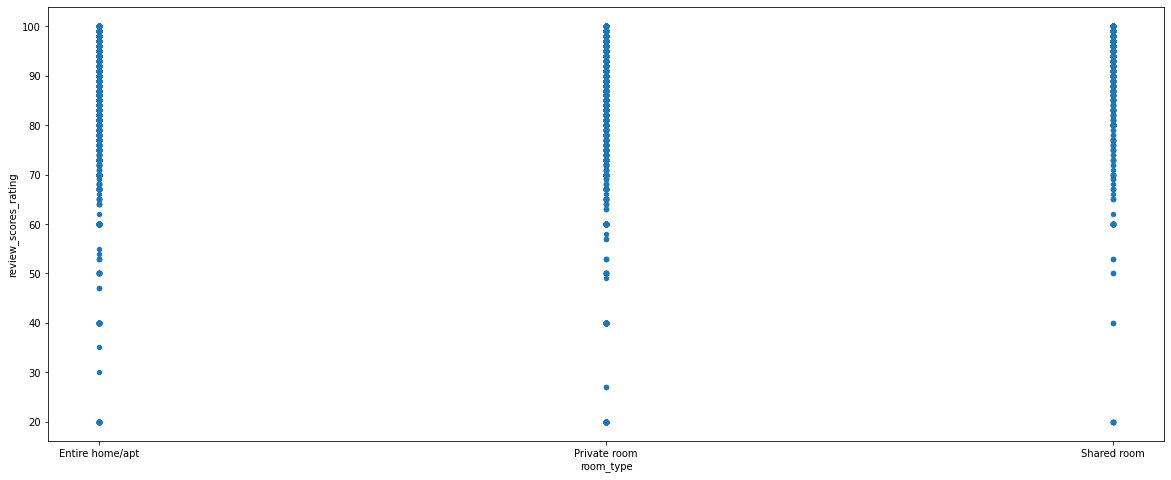

In [31]:
df_train.plot.scatter(x='room_type', y='review_scores_rating', figsize=(20,8));

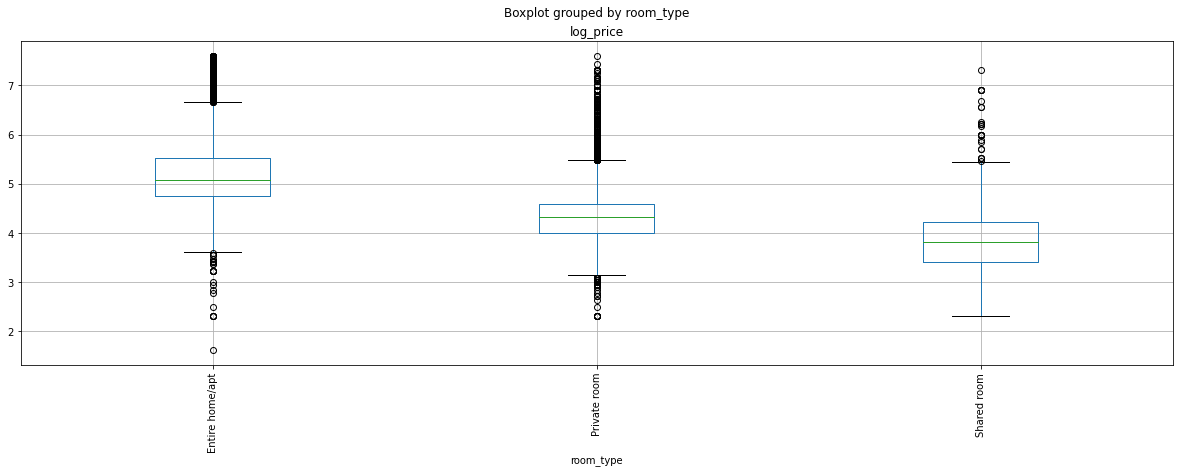

In [32]:
df_train.boxplot(column='log_price', by='room_type', figsize=(20,6), rot=90)

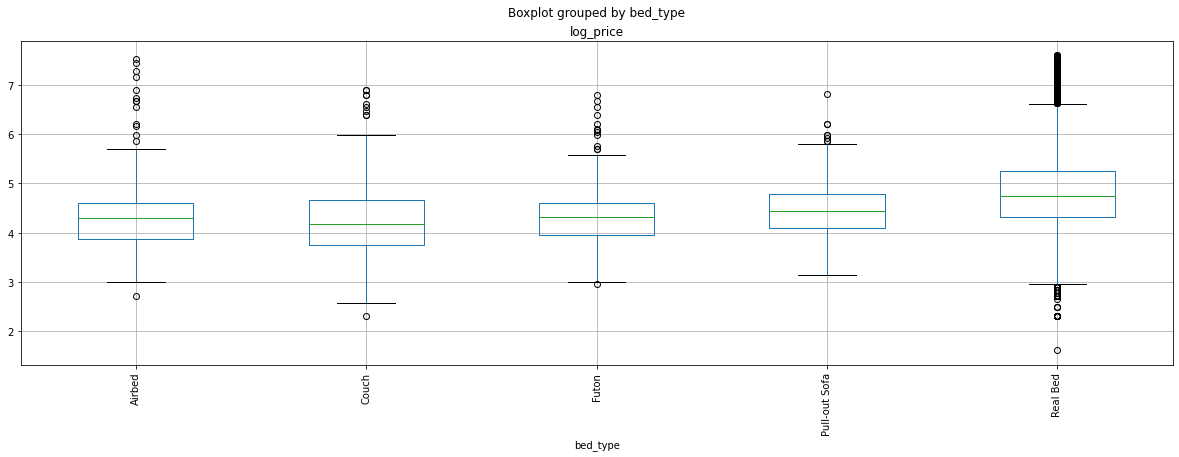

In [33]:
df_train.boxplot(column='log_price', by='bed_type', figsize=(20,6), rot=90)

(array([ 6360., 21529.,  5213.,  8178.,  2304.,  3331.,   640.,  1199.,
          183.,   472.,    51.,   190.,    24.,    77.,    38.,   210.]),
 array([ 1.    ,  1.9375,  2.875 ,  3.8125,  4.75  ,  5.6875,  6.625 ,
         7.5625,  8.5   ,  9.4375, 10.375 , 11.3125, 12.25  , 13.1875,
        14.125 , 15.0625, 16.    ]),
 <a list of 16 Patch objects>)

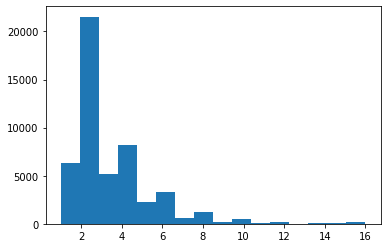

In [34]:
plt.hist(df_train.accommodates,bins=16)

# Feature Engineering

In [35]:
#let separate the catrgorical features for encoding process
list_cate=[]
for i in list(df_train.columns):
    if df_train[i].dtype=='object':
        list_cate.append(i)
   


In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list_cate:
    
    df_train[i]=le.fit_transform(df_train[i])

In [37]:
test_cate=[]
for i in list(df_test.columns):
    if df_test[i].dtype=='object':
        test_cate.append(i)

In [38]:
for i in test_cate:
    df_test[i]=le.fit_transform(df_test[i])

In [39]:
df_train['cleaning_fee']=le.fit_transform(df_train['cleaning_fee'])
df_test['cleaning_fee']=le.fit_transform(df_test['cleaning_fee'])

In [40]:
df_train.head()

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,log_price
0,0,0,3,1.0,4,2,1,40.696524,-73.991617,2,100.000000,1.0,1.0,5.010635
1,0,0,7,1.0,4,2,1,40.766115,-73.989040,6,93.000000,3.0,3.0,5.129899
2,0,0,5,1.0,4,1,1,40.808110,-73.943756,10,92.000000,1.0,3.0,4.976734
3,17,0,4,1.0,4,0,1,37.772004,-122.431619,0,94.055972,2.0,2.0,6.620073
4,0,0,2,1.0,4,1,1,38.925627,-77.034596,4,40.000000,0.0,1.0,4.744932


In [41]:
df_test.head()

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,0,1,2,1.0,4,2,1,40.705948,-73.915318,0,94.091332,1.0,1.0
1,0,0,4,1.0,4,1,1,34.118408,-118.317929,24,100.000000,1.0,1.0
2,0,1,2,1.0,4,0,0,40.707888,-74.015211,0,94.091332,1.0,1.0
3,0,1,2,1.0,4,0,1,40.721388,-73.945642,12,98.000000,1.0,1.0
4,0,0,4,1.0,4,1,1,40.682556,-73.943259,13,92.000000,2.0,3.0


In [42]:
y=df_train['log_price']
x=df_train.drop(['log_price'],axis=1)

# Model building

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
pred_1=lr.predict(x_test)

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test,pred_1))
rmse

0.4932524809358062

In [47]:
from sklearn.metrics import r2_score
score_1=r2_score(y_test,pred_1)
score_1

0.5262626181166644

In [48]:
#lets try another model to reduce the errors

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
rgb=GradientBoostingRegressor()
param_grid={'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] }

In [49]:
clf=GridSearchCV(rgb,param_grid,cv=5,verbose=0)

In [50]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [51]:
rgb=GradientBoostingRegressor(learning_rate=0.1,max_depth=4,max_features=1.0,n_estimators=500)
rgb.fit(x_train,y_train)
pred_2=rgb.predict(x_test)
score_2=r2_score(y_test,pred_2)

In [52]:
score_2

0.7095176973744726

In [53]:
rmse_2 = sqrt(mean_squared_error(y_test,pred_2))
rmse_2

0.38624270485905154

In [54]:
preds=rgb.predict(df_test)

In [55]:
submission=pd.DataFrame({'id':Id,
                       'predictions':preds})

In [56]:
pd.DataFrame(submission).to_csv("case_study_ML.xlsx",index=False)

In [57]:
submission

,id,predictions
0,5979389,4.116650
1,13488121,4.929458
2,8121643,4.781127
3,16490010,4.382610
4,16274069,4.875485
...,...,...
24106,14549287,4.166652
24107,13281809,5.356641
24108,18688039,4.981454
24109,17045948,5.264359


In [58]:
from google.colab import files
files.download("case_study_ML.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Building a neural network model

In [59]:
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

In [61]:
# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(x_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

In [62]:
# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

In [67]:
# Training the model
nn2_history= nn2.fit(x_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)

Epoch 1/100
141/141 [==============================] - 0s 3ms/step - loss: 0.2065 - mean_squared_error: 0.2065 - val_loss: 0.2103 - val_mean_squared_error: 0.2103
Epoch 2/100
141/141 [==============================] - 0s 2ms/step - loss: 0.2113 - mean_squared_error: 0.2113 - val_loss: 0.2144 - val_mean_squared_error: 0.2144
Epoch 3/100
141/141 [==============================] - 0s 2ms/step - loss: 0.2046 - mean_squared_error: 0.2046 - val_loss: 0.2113 - val_mean_squared_error: 0.2113
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 0.2036 - mean_squared_error: 0.2036 - val_loss: 0.2064 - val_mean_squared_error: 0.2064
Epoch 5/100
141/141 [==============================] - 0s 2ms/step - loss: 0.2023 - mean_squared_error: 0.2023 - val_loss: 0.2210 - val_mean_squared_error: 0.2210
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.2028 - mean_squared_error: 0.2028 - val_loss: 0.2062 - val_mean_squared_error: 0.2062
Epoch 7/100
141/141 [=

In [78]:
pred_3=nn2.predict(x_test)
score_3=r2_score(y_test,pred_3)

In [79]:
score_3

0.5946243276013177

In [80]:
rmse_3 = sqrt(mean_squared_error(y_test,pred_3))
rmse_3

0.45627775028208073